In [49]:
import numpy as np
import matplotlib.pyplot as plt

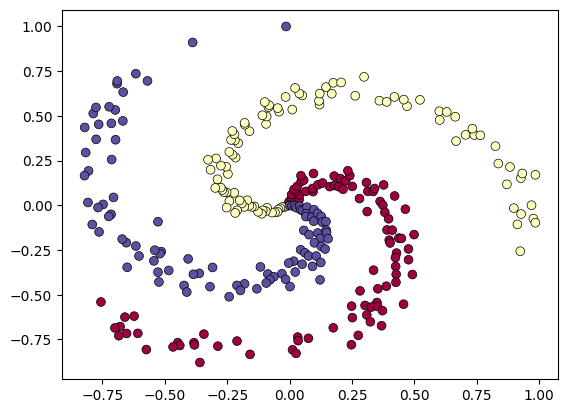

In [50]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k', linewidths=0.5)
plt.show()

#### Initialize the parameters

In [51]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
print(W)

[[-0.00907621 -0.00762875  0.00399856]
 [-0.00917228  0.00060775 -0.0102161 ]]


#### Compute the class scores

In [52]:
scores = np.dot(X, W) + b
scores.shape

(300, 3)

In [53]:
num_examples = X.shape[0]
print(num_examples)
# get unnormalized probabilities
exp_scores = np.exp(scores)

# normalize them for each example

probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

300


In [54]:
correct_logprobs = -np.log(probs[range(num_examples),y])


In [55]:
# compute the loss: average cross-entropy loss and regularization
# compute the loss: average cross-entropy loss and regularization
data_loss = np.sum(correct_logprobs)/num_examples
reg = 0.01 # regularization strength
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss


In [56]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples


In [57]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient


In [58]:
# perform a parameter update
W += -step_size * dW
b += -step_size * db

In [59]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print( "iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.097713
iteration 10: loss 0.912816
iteration 20: loss 0.844077
iteration 30: loss 0.812980
iteration 40: loss 0.796894
iteration 50: loss 0.787794
iteration 60: loss 0.782314
iteration 70: loss 0.778862
iteration 80: loss 0.776613
iteration 90: loss 0.775109
iteration 100: loss 0.774082
iteration 110: loss 0.773370
iteration 120: loss 0.772870
iteration 130: loss 0.772515
iteration 140: loss 0.772261
iteration 150: loss 0.772078
iteration 160: loss 0.771945
iteration 170: loss 0.771848
iteration 180: loss 0.771777
iteration 190: loss 0.771725


In [60]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


#### Training A Neural Network

In [61]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [62]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
print(hidden_layer.shape)
scores = np.dot(hidden_layer, W2) + b2
print(scores.shape)

(300, 100)
(300, 3)


In [63]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [64]:
dhidden = np.dot(dscores, W2.T)

In [65]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

In [66]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [68]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098576
iteration 1000: loss 0.317437
iteration 2000: loss 0.254008
iteration 3000: loss 0.250055
iteration 4000: loss 0.249496
iteration 5000: loss 0.249256
iteration 6000: loss 0.249114
iteration 7000: loss 0.249014
iteration 8000: loss 0.248926
iteration 9000: loss 0.248884


In [69]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


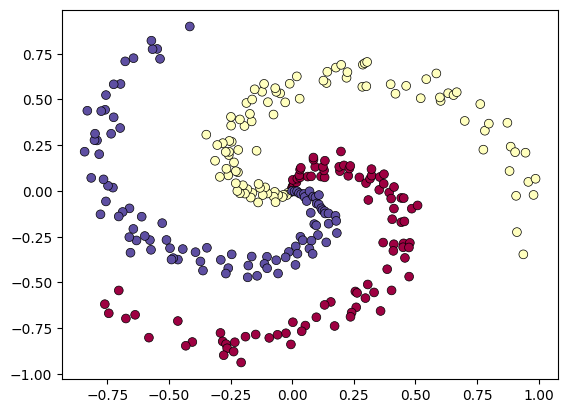

iteration 0: loss 1.098662
iteration 1000: loss 0.294330
iteration 2000: loss 0.271699
iteration 3000: loss 0.256935
iteration 4000: loss 0.250355
iteration 5000: loss 0.248073
iteration 6000: loss 0.246743
iteration 7000: loss 0.245869
iteration 8000: loss 0.245258
iteration 9000: loss 0.244447
training accuracy: 0.99
